# Video game market reseach

<a id="cont"></a>
## Table of contents

 * __[Project description](#desc)__
 
 
 * __[Project stages](#stages)__

   * __[1. Data preprocessing](#id1)__

     * _[Conclusions](#conc1)_
   
   * __[2. Exploratory data analysis](#id2)__

     * _[Conclusions](#conc2)_
    
   * __[3. Creating a user profile for each region](#id3)__

     * _[Conclusions](#conc3)_
      
   * __[4. Hypothesis testing](#id4)__

     * ___[1. Average user ratings of the Xbox One and PC platforms are the same](#task5_1)___
     
     * _[Conclusions](#conc5_1)_
     
     * ___[2. Average user ratings for the Action and Sports genres are different](#task5_2)___
     
     * _[Conclusions](#conc5_2)_


 * __[General conclusions](#id6)__

<a id=desc></a>
### Project description


We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

Our task is to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.


<a id=stages></a>
### Project stages

[Back to contents](#cont)

<a id="id1"></a>
###  1. Data preprocessing

Import the libraries.

In [2]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from simple_colors import *

import copy

from scipy import stats as st


Import and study the data file.

In [4]:
df=pd.read_csv('games.csv')
display(df.info())
display(df.describe(include='all').T)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

count unique                          top  freq       mean  \
Name             16713  11559  Need for Speed: Most Wanted    12        NaN   
Platform         16715     31                          PS2  2161        NaN   
Year_of_Release  16446    NaN                          NaN   NaN    2006.48   
Genre            16713     12                       Action  3369        NaN   
NA_sales         16715    NaN                          NaN   NaN   0.263377   
EU_sales         16715    NaN                          NaN   NaN    0.14506   
JP_sales         16715    NaN                          NaN   NaN  0.0776171   
Other_sales      16715    NaN                          NaN   NaN  0.0473419   
Critic_Score      8137    NaN                          NaN   NaN    68.9677   
User_Score       10014     96                          tbd  2424        NaN   
Rating            9949      8                            E  3990        NaN   

                      std   min   25%   50%   75%    max  
Name                  NaN   NaN   NaN   NaN   NaN    NaN  
Platform              NaN   NaN   NaN   NaN   NaN    NaN  
Year_of_Release   5.87705  1980  2003  2007  2010   2016  
Genre                 NaN   NaN   NaN   NaN   NaN    NaN  
NA_sales         0.813604     0     0  0.08  0.24  41.36  
EU_sales         0.503339     0     0  0.02  0.11  28.96  
JP_sales         0.308853     0     0     0  0.04  10.22  
Other_sales      0.186731     0     0  0.01  0.03  10.57  
Critic_Score      13.9382    13    60    71    79     98  
User_Score            NaN   NaN   NaN   NaN   NaN    NaN  
Rating                NaN   NaN   NaN   NaN   NaN    NaN

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

1. Column `Name`:

In [6]:
df[df['Name'].isnull()]

Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

2. Column `Platform`:

In [5]:
df.Platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

3. Column `Year_of_Release`:

In [7]:
print('There are {} ({:.2%}) values of "NaN" in the column.'.format(df['Year_of_Release'].isna().sum(),df['Year_of_Release'].isna().sum() / len(df)))

There are 269 (1.61%) values of "NaN" in the column.


4. Column `Genre`:

In [8]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

5. Column `Critic_Score`:

In [9]:
print('There are {} ({:.2%}) values of "NaN" in the column.'.format(df['Critic_Score'].isna().sum(),df['Critic_Score'].isna().sum() / len(df)))

There are 8578 (51.32%) values of "NaN" in the column.


6. Column `User_Score`:

In [10]:
print('There are {} ({:.2%}) values of "NaN" in the column.'.format(df['User_Score'].isna().sum(),df['User_Score'].isna().sum() / len(df)))

There are 6701 (40.09%) values of "NaN" in the column.


In [11]:
print('There are {} ({:.2%}) values of "tbd" in the column.'.format(df.query('User_Score == "tbd"')['User_Score'].count(),df.query('User_Score == "tbd"')['User_Score'].count() / len(df) ))

There are 2424 (14.50%) values of "tbd" in the column.


7. Column `Rating`:

In [12]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [13]:
print('There are {} ({:.2%}) values of "NaN" in the column.'.format(df['Rating'].isna().sum(),df['Rating'].isna().sum() / len(df)))

There are 6766 (40.48%) values of "NaN" in the column.


**We founf out:**

 * Our dataset has *11* columns and *16715* rows. A few words about data:
 * Column `Name`: Need to remove 2 values of "**NaN**"
 * Column `Year_of_Release`:
   - There are **269 (1.61%)** values of "**NaN**" in the column. 
   - Need to change datatype for the column from *float* to *integer*, because it's logical and more accurate.
 * Column `Genre`: Need to remove 2 values of "**NaN**" (the same rows as for `Name`)
 * Column `Critic_Score`:
   - There are **8578 (51.32%)** values of "**NaN**" in the column.
   - Need to change datatype for the column from *float* to *integer*, because it's more accurate.
 * Column `User_Score`:
   - There are **6701 (40.09%)** values of "**NaN**" in the column.
   - Also there are **2424 (14.50%)** values of **tbd** in the column.
   - Need to change datatype for the column from *object* to *float* to make calculations and analysis.
 * Column `Rating`: There are **6766 (40.48%)** values of "**NaN**" in the column.
 * Columns `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`: All entires has value.
 

**(!)** So, now we can prepare our data for further analysis.

[Back to contents](#cont)

**1.** Let's make the column names in lowecase

In [14]:
df.columns=df.columns.str.lower()

**2.** Let's remove 2 rows with __NaN__ in the column `name`

In [15]:
df = df.dropna(subset=['name']).reset_index(drop= True)

**3.** Let's replace __NaN__ in the column `year_of_release` with some value and change datatype from __float__ to __integer__.

**(!)** Since there are only **1.6%** of values we need to replace, I will use "0" for that purposes.

In [16]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release']=df['year_of_release'].astype(int)

**4.** Before making other replacements and changes let's calculate the total profit for each game.

In [17]:
df['total_sales']=df[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0     28.96      3.77         8.45          76.0          8      E   
1      3.58      6.81         0.77           NaN        NaN    NaN   
2     12.76      3.79         3.29          82.0        8.3      E   
3     10.93      3.28         2.95          80.0          8      E   
4      8.89     10.22         1.00           NaN        NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

In [18]:
df['total_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [19]:
df.nlargest(10,'total_sales')

name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0     41.36     28.96      3.77         8.45          76.0          8      E   
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN   
2     15.68     12.76      3.79         3.29          82.0        8.3      E   
3     15.61     10.93      3.28         2.95          80.0          8      E   
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN   
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN   
6     11.28      9.14      6.50         2.88          89.0        8.5      E   
7     13.96      9.18      2.93         2.84          58.0        6.6      E   
8     14.44      6.94      4.70         2.24          87.0        8.4      E   
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26  
6        29.80  
7        28.91  
8        28.32  
9        28.31

**5.** Let's do something with columns `critic_score`, `user_score` and `rating`.

**(!)** As we know there are many missing values in th columns `critic_score`, `user_score`, `rating` that need to be replaced. But for me this is a big question how to do it correctly. Probably there could be a correlation between `critic_score`|`user_score` and sales. For `critic_score` we can even easily check it. But what's next? The `total_sales` are all different. 

The **.transform()** method with mean(or median) for grouped `total_sales` won't fill all the missing values. Make some additional calculations? I'm not sure if this is necessary here.That is why after checking for missing values and **tbd** over the years, I just replace them with **0**.

In [20]:
df[df.critic_score.isnull()]['year_of_release'].value_counts()

2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
1999    299
2005    284
1997    272
2013    271
2016    270
1996    255
1995    219
2000    207
2002    202
2004    201
2003    190
2001    156
1994    120
0       115
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1989     17
1983     17
1987     16
1990     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: int64

In [21]:
df[df.user_score.isnull()]['year_of_release'].value_counts()

2010    457
2008    440
2011    418
2009    407
2007    376
1998    348
2006    330
1999    299
2012    290
2015    271
1997    270
1996    255
2005    235
2014    231
2013    225
1995    219
2016    206
2000    200
2002    173
2004    166
2003    164
2001    143
1994    120
0        94
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: int64

In [22]:
df[df.user_score == 'tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
0        48
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

In [23]:
print('The correletion between total_sales and critic_score = {:.2f}'.format(df['total_sales'].corr(df['critic_score'])))

The correletion between total_sales and critic_score = 0.25


**(!)** There are missing values and tbd not only in the last year (2016) or old years (1980-1990), but almost in every year. And correletion between sales and critic_score is not so high. So, let's replace **NaN**/**tbd** with **0**.

In [24]:
df['critic_score']=df['critic_score'].fillna(0)
df['critic_score']=df['critic_score'].astype(int)

In [25]:
df['user_score']=df['user_score'].fillna('0')
df['user_score']=df['user_score'].replace('tbd', '0')
df['user_score']=df['user_score'].astype(float)

**(!)** The same for `rating`: I'm not sure how to fill it correct. That is why I just replace **NaN** with **Unknown**.

In [26]:
df['rating']=df['rating'].fillna('Unknown')

**6.** Let's check duplicates for key columns.

In [27]:
df[df.duplicated(subset=['name','platform','year_of_release','genre'],keep=False)]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16228  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  total_sales  
604         0.0         0.23            83         5.5      E         2.56  
16228       0.0         0.00            83         5.5      E         0.01

**(!)** Only 2 rows. I'll remove the second row.

In [28]:
df=(df.drop((df[df.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep='first')]).index).reset_index(drop=True)
             )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  int32  
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


<a id="conc1"></a>
**Conclusions**


1. There are only 3 removed rows (2 with **NaN** in the `name`/`genre` and 1 duplicate).

2. More than 50% of the data in the columns `critic_score` and `user_score` were replaced with **0**.

3. About 40% of the data in the column `rating` were replaced with **unknown**.

4. After all manipulations we have table with 16712 rows, 12 columns with correct datatypes for all columns and without **NaN**.

Let's start our analysis

[Back to contents](#cont)

<a id="id2"></a>
### 2. Exploratory data analysis

**1.** Let's have a look at how many games were released in different years and check if the data for every period is significant.

In [29]:
df_years=df[['year_of_release','name']].groupby('year_of_release').count().sort_values(by='year_of_release')\
                                       .reset_index()
df_years.head(10)

year_of_release  name
0                0   269
1             1980     9
2             1981    46
3             1982    36
4             1983    17
5             1984    14
6             1985    14
7             1986    21
8             1987    16
9             1988    15

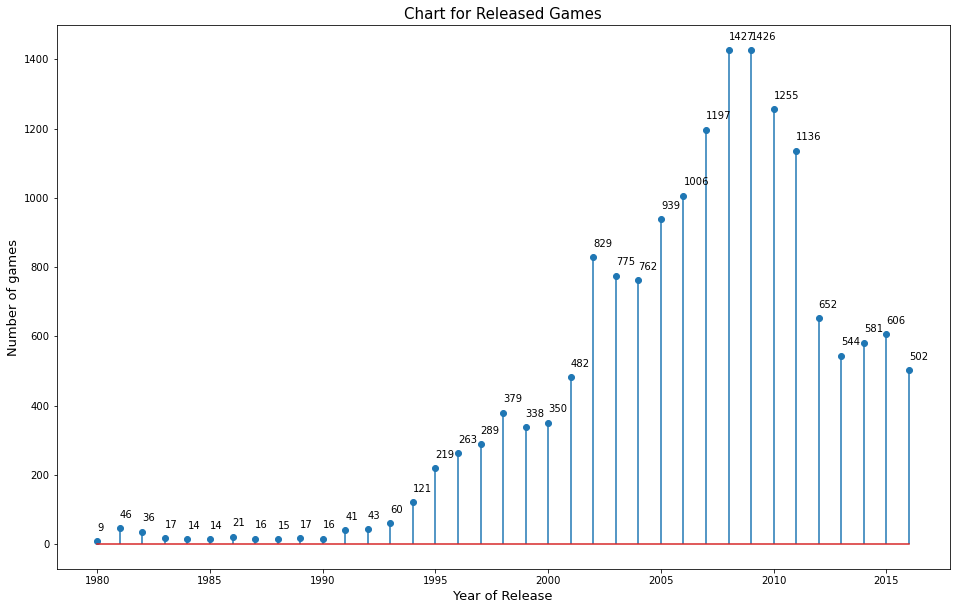

In [30]:
df_years=df_years[df_years['year_of_release'] != 0]

x=df_years['year_of_release']
y=df_years['name']

plt.figure(figsize=(16, 10))

plt.stem(x, y, use_line_collection=True)

plt.title('Chart for Released Games', fontdict={'size':15})
plt.ylabel('Number of games', fontdict={'size':13})
plt.xlabel('Year of Release', fontdict={'size':13})

for row in df_years.itertuples():
    plt.text(row.year_of_release, row.name+30, s=round(row.name))

plt.show()

**Conclusion:** 

No, the number of released games are not significant for every period. Until 1994 less than 100 games were released per year. The peak of production was in 2008-2009. And since 2010, the number of games released has been falling.

In my opinion, the possible reasons for the growth in the number of games are obvious: the active development of digital technologies. But I'm not so shure about reasons for decrease in the number of games...maybe because of the same reason: higher quality, heavy content, the emergence of virtual reality technologies require more time, money and intellectual investments to produce and launch new games.

[Back to contents](#cont)

**2.** In this step let's do the followings:
  * Have a look at how sales varied from platform to platform.
  * Choose the platforms with the greatest total sales and build a distribution based on data for each year.
  * Find platforms that used to be popular but now have zero sales.
  * Figure out how long it generally takes for new platforms to appear and old ones to fade.

In [31]:
df_plat1=df[['platform','total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
df_plat1

platform  total_sales
0      PCFX         0.03
1        GG         0.04
2       3DO         0.10
3      TG16         0.16
4        WS         1.42
5        NG         1.44
6       SCD         1.86
7        DC        15.95
8       GEN        28.35
9       SAT        33.59
10      PSV        54.07
11     WiiU        82.19
12     2600        96.98
13     XOne       159.32
14       GC       198.93
15     SNES       200.04
16      N64       218.68
17      NES       251.05
18       GB       255.46
19       XB       257.74
20      3DS       259.00
21       PC       259.52
22      PSP       294.05
23      PS4       314.14
24      GBA       317.85
25       PS       730.86
26       DS       806.12
27      Wii       907.51
28      PS3       939.64
29     X360       971.42
30      PS2      1255.77

In [32]:
df_plat1['sales_z']=(df_plat1['total_sales']-df_plat1['total_sales'].mean())/df_plat1['total_sales'].std()
df_plat1.tail()

platform  total_sales   sales_z
26       DS       806.12  1.489276
27      Wii       907.51  1.780443
28      PS3       939.64  1.872713
29     X360       971.42  1.963977
30      PS2      1255.77  2.780560

In [33]:
df_plat1['colors']=['red' if x<0 else 'green' for x in df_plat1['sales_z']]
df_plat1.sample(5)

platform  total_sales   sales_z colors
12     2600        96.98 -0.547199    red
24      GBA       317.85  0.087085  green
25       PS       730.86  1.273148  green
10      PSV        54.07 -0.670425    red
9       SAT        33.59 -0.729239    red

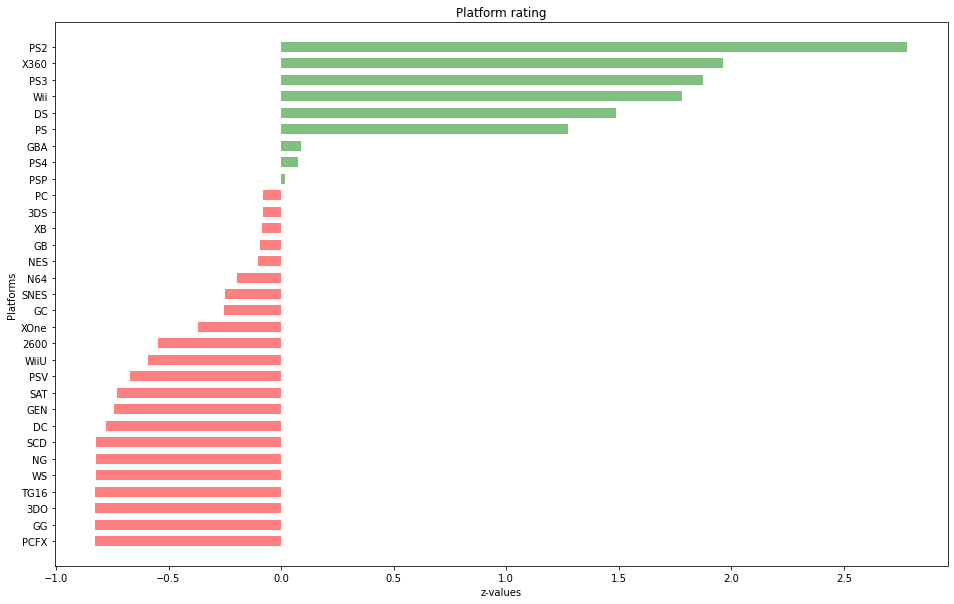

In [34]:
plt.figure(figsize=(16,10))
plt.hlines(y=df_plat1['platform'],xmin=0,xmax=df_plat1['sales_z'],color=df_plat1['colors'],alpha=0.5, linewidth=10)
plt.ylabel('Platforms')
plt.xlabel('z-values')
plt.title('Platform rating')
plt.show()

**(!)** As we can see there are 9 platforms with a z-score greater than 0. That means we can call them the sales leaders. I'll use them in the next step to plot a graph for each year. 

In [35]:
df1=df[df['year_of_release']!=0]
platform_top=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP']
grouped=df1.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
slice_top=grouped[grouped['platform'].isin(platform_top)]

fig_slice_top=px.line(slice_top, x='year_of_release', y='total_sales', color='platform',\
                      title='Total sales by year Top Platforms')
fig_slice_top.show()

**Conclusions:** 

 * As we can see all the platforms have periods of growth and decline. Minimum sales in peak years for them - about 50 mln.USD.
 * ___DS___: a platform - "long-liver"(start of the release of the games in 1985 and end of release - in 2013). The most profitable periods are from 2005 to 2009.
 * ___Wii___: a platform - "great startup". It started in 2006 with very high first year total sales - 137 mln.USD.
 * ___PS2___: a platform with the highest annual sales - 212 mln.USD in 2004y.
 * ___PS4___: the "youngest" platform with start of release of the games in 2013y.

**(!)** To answer the next question (about popular platform in the past with 0 sales now) I'll filtered data with 0 total sales in 2016y.

In [36]:
names_pl=df1.query('year_of_release == 2016')['platform'].unique()
names_pl

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [37]:
df2=df1.query('platform not in @names_pl')
df2.sample(5)

name platform  year_of_release      genre  \
14357                Vitamin X Evolution       DS             2008  Adventure   
2202                               Bully      PS2             2006     Action   
4232   Brothers In Arms: Earned in Blood      PS2             2005    Shooter   
16240      Monkey Madness: Island Escape       DS             2010     Action   
6695                Sentimental Graffiti      SAT             1998  Adventure   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
14357      0.00      0.00      0.03         0.00             0         0.0   
2202       0.75      0.03      0.04         0.12            87         9.1   
4232       0.38      0.01      0.00         0.06            71         7.9   
16240      0.01      0.00      0.00         0.00             0         0.0   
6695       0.00      0.00      0.25         0.00             0         0.0   

        rating  total_sales  
14357  Unknown         0.03  
2202         T         0.94  
4232         M         0.45  
16240     E10+         0.01  
6695   Unknown         0.25

In [38]:
grouped_new=df2.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

fig_slice_old=px.line(grouped_new, x='year_of_release', y='total_sales', color='platform',\
                      title='Total sales by year Platforms with 0 sales in 2016')
fig_slice_old.show()

**Conclusion:** 

Most of these platforms have sales of less than 50 mln.USD per year. Five platforms from this list are in the Top-9 (from the previous task)

In [39]:
fig_slice_all=px.line(grouped, x='year_of_release', y='total_sales', color='platform', title='Total sales by year All Platforms')
fig_slice_all.show()

**Conclusions:** 

 * As we can see from this graph, a new platform appears every 2-3 years, and the old one fades in a period of 2 to 8 years.
 * In my opinion the main reason for the emergence of new platforms and the decrease in the number of released games and their sales on existing platforms is the development of technologies and changes in user preferences.

[Back to contents](#cont)

**3.** In this step, let's find out:
 * Which platforms are leading in sales? 
 * Which ones are growing or shrinking? 
 * Which ones are potentially profitable platforms.

**(!)** From now on I want to use only relevant data and not use data from previous years. As you can see from the graph with games by year, only since 2001 the number of games released per year is about 500 g/y. So, I want to take data after 2000 for the following calculations.

In [40]:
df_new=df.query('year_of_release>2000')
df_new.head()

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
6      9.14      6.50         2.88            89         8.5      E   
7      9.18      2.93         2.84            58         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91

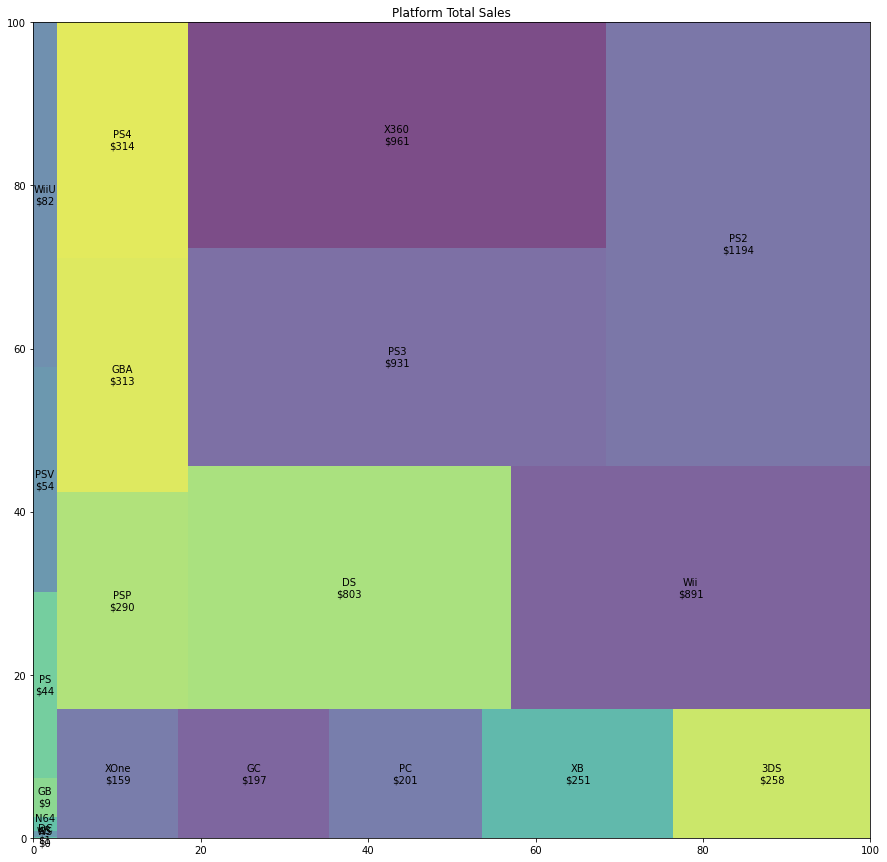

In [41]:
df_plat_tree=df_new[['platform','total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
sizes=df_plat_tree['total_sales'].values.tolist()
labels=df_plat_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)

plt.figure(figsize=(15,15))
squarify.plot(sizes=sizes,label=labels, alpha=0.7)
plt.title('Platform Total Sales')
plt.show()

**Conclusion:** 

As we can see from the graph there are three leaders with total sales about 1 bln.USD: PS2, X360, PS3.  

In [42]:
df_new_pivot=df_new.pivot_table(index='year_of_release', columns='platform', values='total_sales',aggfunc=sum,\
                                fill_value=0)

dynamics=df_new_pivot-df_new_pivot.shift(+1)
dynamics.T

year_of_release  2001   2002   2003   2004    2005    2006   2007   2008  \
platform                                                                   
3DS               NaN   0.00   0.00   0.00    0.00    0.00   0.00   0.00   
DC                NaN  -0.78  -0.29   0.00    0.00    0.00   0.02   0.02   
DS                NaN   0.00   0.00  17.27  112.87  -10.33  27.13  -1.63   
GB                NaN  -9.24   0.00   0.00    0.00    0.00   0.00   0.00   
GBA               NaN  12.63 -17.49  21.24  -44.05  -28.58  -1.88  -3.40   
GC                NaN  25.47  -1.20 -21.79   -1.20  -16.36 -10.99  -0.27   
N64               NaN  -3.17  -0.08   0.00    0.00    0.00   0.00   0.00   
PC                NaN   3.10   0.27   1.55   -6.02   -1.52   6.43   3.14   
PS                NaN -28.92  -4.60  -2.07    0.00    0.00   0.00   0.00   
PS2               NaN  38.95 -21.07  27.50  -51.15  -57.24 -27.43 -22.09   
PS3               NaN   0.00   0.00   0.00    0.00   20.96  52.23  45.33   
PS4               NaN   0.00   0.00   0.00    0.00    0.00   0.00   0.00   
PSP               NaN   0.00   0.00   7.06   36.78   11.48  -8.39 -12.38   
PSV               NaN   0.00   0.00   0.00    0.00    0.00   0.00   0.00   
WS                NaN  -0.28   0.00   0.00    0.00    0.00   0.00   0.00   
Wii               NaN   0.00   0.00   0.00    0.00  137.15  15.62  18.55   
WiiU              NaN   0.00   0.00   0.00    0.00    0.00   0.00   0.00   
X360              NaN   0.00   0.00   0.00    8.25   43.37  43.79  39.85   
XB                NaN  25.75   7.03  10.38  -16.34  -39.04  -9.49  -0.37   
XOne              NaN   0.00   0.00   0.00    0.00    0.00   0.00   0.00   

year_of_release   2009   2010   2011   2012   2013   2014   2015   2016  
platform                                                                 
3DS               0.00   0.00  63.20 -11.84   5.21 -12.81 -15.98 -12.64  
DC               -0.04   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
DS              -25.77 -34.52 -58.84 -15.17  -9.47  -1.54   0.00   0.00  
GB                0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
GBA               0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
GC                0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
N64               0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
PC                4.49   7.37  10.75 -11.81 -10.84   0.90  -4.76  -3.27  
PS                0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
PS2             -27.50 -20.76  -5.19  -0.45   0.00   0.00   0.00   0.00  
PS3              12.41  11.24  14.61 -49.43   5.90 -65.49 -30.94 -13.22  
PS4               0.00   0.00   0.00   0.00  25.99  74.01  18.90 -49.65  
PSP               3.23  -2.74 -17.22 -10.13  -4.55  -2.90  -0.12  -0.12  
PSV               0.00   0.00   4.63  11.56  -5.60   1.31  -5.65  -2.00  
WS                0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
Wii              35.65 -79.02 -68.30 -37.94 -13.12  -4.84  -2.61  -0.96  
WiiU              0.00   0.00   0.00  17.56   4.09   0.38  -5.68 -11.75  
X360            -14.97  49.74 -26.19 -44.10 -11.16 -53.84 -22.78 -10.44  
XB               -0.18   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
XOne              0.00   0.00   0.00   0.00  18.96  35.11   6.07 -33.99

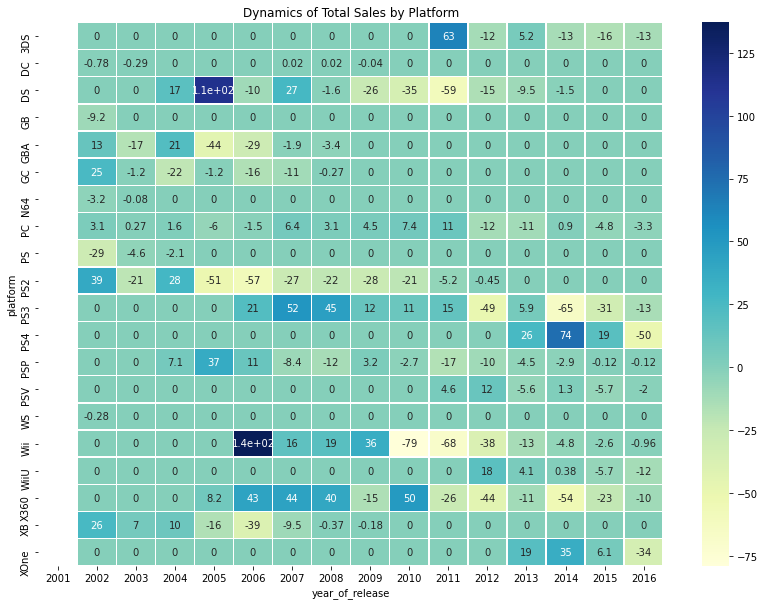

In [43]:
plt.figure(figsize=(14,10))
sns.heatmap(dynamics.T, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Dynamics of Total Sales by Platform')
plt.show()

**Conclusions:**
 * Leaders of the sales are PS2, X360 and PS3.
 * If not take the data for 2016 (because we know from the description that the data is incomplete), then according to the data for 2015-2014, only two platforms (PS4 and XOne) are growing, while the rest are shrinking.
 * The same two platforms we can call potentiotally profitable.* 

[Back to contents](#cont)

**4.** Let's build a box plot for the global sales of all games, broken down by platform.

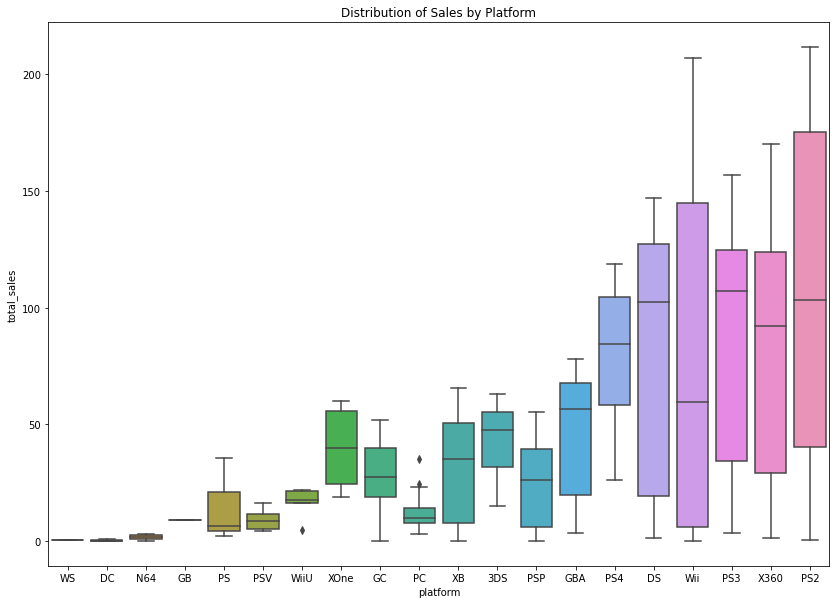

In [44]:
grouped_new=df_new.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
ordered=grouped_new.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

plt.figure(figsize=(14,10))
sns.boxplot(x='platform', y='total_sales', data=grouped_new, order=ordered)
plt.title('Distribution of Sales by Platform')
plt.show()

In [45]:
df_plat_mean=grouped_new.pivot_table(index='platform', values='total_sales')
df_plat_mean.sort_values(by='total_sales', ascending=False)

total_sales
platform             
PS2        108.580909
PS3         84.666364
Wii         81.016364
DS          80.276000
X360        80.103333
PS4         78.535000
GBA         44.687143
3DS         42.968333
XOne        39.830000
XB          31.322500
GC          28.104286
PSP         24.127500
WiiU        16.438000
PS          14.776667
PC          12.566250
GB           9.240000
PSV          8.968333
N64          1.665000
DC           0.355000
WS           0.280000

**Conclusion:** 

Yes, we can say that the difference in sales between platforms are significant. For inctance: the medians of the leaders are more than 50 mln.USD; minimum for PS4 is more than the medians for the most platforms. This platform is one of the new leaders for the next years. We see almost the same result from the platforms averages.

[Back to contents](#cont)

**5.** Let's take a look at how user and professional reviews affect sales for one popular platform.

**(!)** For that task I'll delete all **0** from the columns **user_score** and **critic_score** so that the former missing values do not affect the results.

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14119 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14119 non-null  object 
 1   platform         14119 non-null  object 
 2   year_of_release  14119 non-null  int32  
 3   genre            14119 non-null  object 
 4   na_sales         14119 non-null  float64
 5   eu_sales         14119 non-null  float64
 6   jp_sales         14119 non-null  float64
 7   other_sales      14119 non-null  float64
 8   critic_score     14119 non-null  int32  
 9   user_score       14119 non-null  float64
 10  rating           14119 non-null  object 
 11  total_sales      14119 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.3+ MB


In [47]:
df_new.query('(critic_score ==0) or (user_score ==0)')['platform'].count()

7410

In [48]:
df_filtered=df_new.query('(critic_score !=0) and (user_score !=0)')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6709 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6709 non-null   object 
 1   platform         6709 non-null   object 
 2   year_of_release  6709 non-null   int32  
 3   genre            6709 non-null   object 
 4   na_sales         6709 non-null   float64
 5   eu_sales         6709 non-null   float64
 6   jp_sales         6709 non-null   float64
 7   other_sales      6709 non-null   float64
 8   critic_score     6709 non-null   int32  
 9   user_score       6709 non-null   float64
 10  rating           6709 non-null   object 
 11  total_sales      6709 non-null   float64
dtypes: float64(6), int32(2), object(4)
memory usage: 629.0+ KB


Scatterplots and correlations between critic_score/user_score and total_sales for platform PS2.




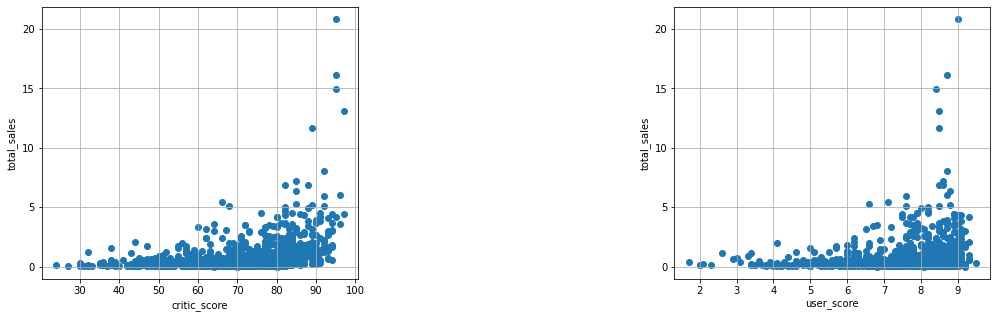

The correlation between total_sales and critic_score = 0.39.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.17.
It is weak, thus we can say that user_score does not influence the total_sales


In [49]:
def platform_corr(name):
    df_filtered_platform = df_filtered[df_filtered['platform'] == name]
    
    print(black('Scatterplots and correlations between critic_score/user_score and total_sales for platform {}.'\
                .format(name), 'bold'))
    print()
    print()
    
    fig, (axs1,axs2) = plt.subplots(1, 2, figsize=(17,5))
    fig.subplots_adjust(hspace=1,wspace=1)
    
    axs1.scatter(df_filtered_platform['critic_score'],df_filtered_platform['total_sales'])
    axs1.set_xlabel('critic_score')

    axs2.scatter(df_filtered_platform['user_score'],df_filtered_platform['total_sales'],)
    axs2.set_xlabel('user_score')
    
    for axs in [axs1,axs2]:
        axs.yaxis.grid(True)
        axs.xaxis.grid(True)
        axs.set_ylabel('total_sales')
    plt.show()
    
    corr_critic=df_filtered_platform['critic_score'].corr(df_filtered_platform['total_sales'])
    corr_user=df_filtered_platform['user_score'].corr(df_filtered_platform['total_sales'])
    
    if corr_critic<0.5:
        (print('The correlation between total_sales and critic_score = {:.2f}.\nIt is weak, thus we can say that critic_score does not influence the total_sales'.
              format(corr_critic)
              )
        )
    else:
        (print('The correlation between total_sales and critic_score = {:.2f}.\nIt is strong, thus we can say that critic_score influence the total_sales'.
              format(corr_critic)
              )
        )
    
    print()
        
    if corr_user<0.5:
        (print('The correlation between total_sales and user_score = {:.2f}.\nIt is weak, thus we can say that user_score does not influence the total_sales'.
              format(corr_user)
              )
        )
    else:
        (print('The correlation between total_sales and user_score = {:.2f}.\nIt is strong, thus we can say that user_score influence the total_sales'.
              format(corr_user)
              )
        )
platform_corr('PS2')

[Back to contents](#cont)

**6.** Keeping previous conclusions in mind, I want to compare the sales of the same games on other platforms.

In [50]:
same_games=df_filtered.query('platform == "PS2"')['name'].unique()
same_games

array(['Grand Theft Auto: San Andreas', 'Grand Theft Auto: Vice City',
       'Gran Turismo 3: A-Spec', ..., 'Metal Slug Anthology',
       "Greg Hastings' Tournament Paintball Max'd", 'Micro Machines V4'],
      dtype=object)

In [51]:
platforms_same_games=df_filtered[df_filtered['name'].isin(same_games)]
platforms_same_games

name platform  year_of_release      genre  \
17      Grand Theft Auto: San Andreas      PS2             2004     Action   
24        Grand Theft Auto: Vice City      PS2             2002     Action   
28             Gran Turismo 3: A-Spec      PS2             2001     Racing   
38               Grand Theft Auto III      PS2             2001     Action   
48                     Gran Turismo 4      PS2             2004     Racing   
...                               ...      ...              ...        ...   
16529               Alone in the Dark       PC             2008  Adventure   
16542     Madagascar: Escape 2 Africa       PC             2008     Action   
16588               Micro Machines V4      PS2             2006     Racing   
16611        Legacy of Kain: Defiance       PC             2003     Action   
16670  Mortal Kombat: Deadly Alliance      GBA             2002   Fighting   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
17         9.43      0.40      0.41        10.57            95         9.0   
24         8.41      5.49      0.47         1.78            95         8.7   
28         6.85      5.09      1.87         1.16            95         8.4   
38         6.99      4.51      0.30         1.30            97         8.5   
48         3.01      0.01      1.10         7.53            89         8.5   
...         ...       ...       ...          ...           ...         ...   
16529      0.00      0.01      0.00         0.00            55         5.7   
16542      0.01      0.00      0.00         0.00            58         8.0   
16588      0.01      0.00      0.00         0.00            64         6.8   
16611      0.00      0.01      0.00         0.00            70         8.7   
16670      0.01      0.00      0.00         0.00            81         8.8   

      rating  total_sales  
17         M        20.81  
24         M        16.15  
28         E        14.97  
38         M        13.10  
48         E        11.65  
...      ...          ...  
16529      M         0.01  
16542   E10+         0.01  
16588      E         0.01  
16611      M         0.01  
16670      M         0.01  

[2112 rows x 12 columns]

In [52]:
platform_names=platforms_same_games.query('platform !="PS2"')['platform'].unique()
platform_names

array(['PSP', 'Wii', 'X360', 'GBA', 'PS', 'DS', 'XB', 'PS3', 'GC', 'PC',
       '3DS'], dtype=object)

Scatterplots and correlations between critic_score/user_score and total_sales for platform PSP.




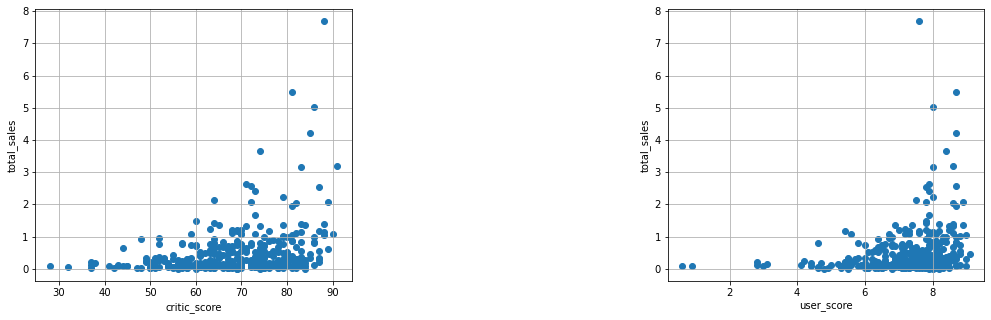

The correlation between total_sales and critic_score = 0.30.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.23.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform Wii.




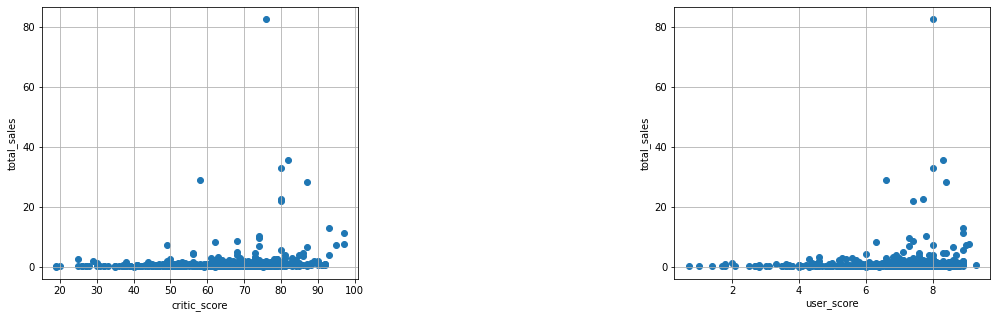

The correlation between total_sales and critic_score = 0.17.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.11.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform X360.




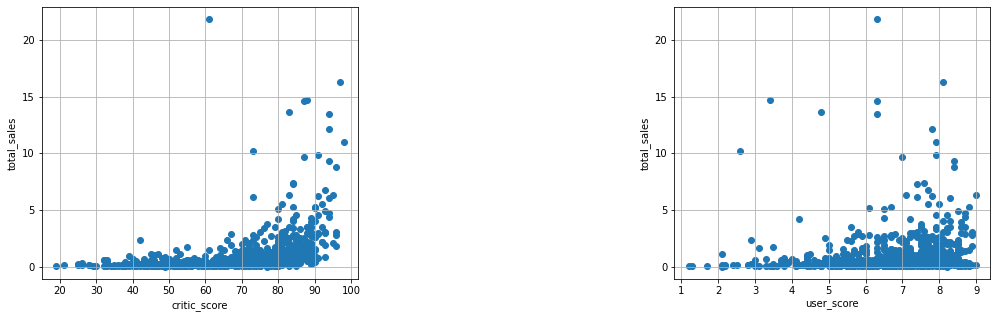

The correlation between total_sales and critic_score = 0.39.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.11.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform GBA.




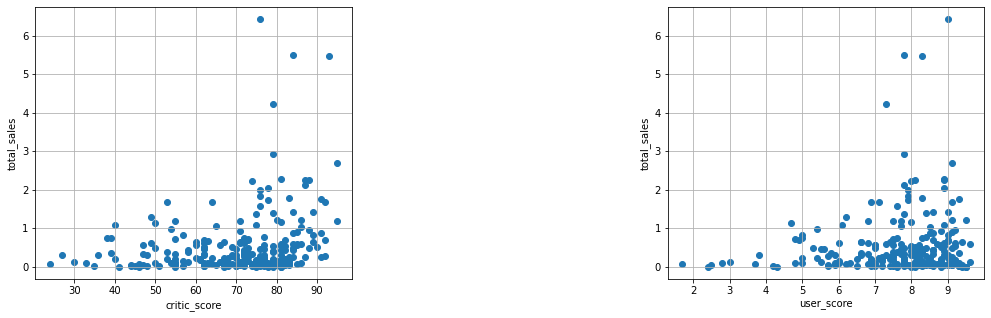

The correlation between total_sales and critic_score = 0.24.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.11.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform PS.




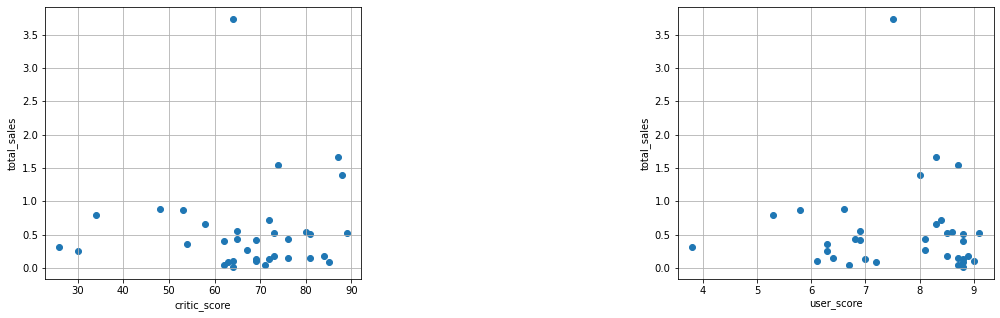

The correlation between total_sales and critic_score = 0.04.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = -0.01.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform DS.




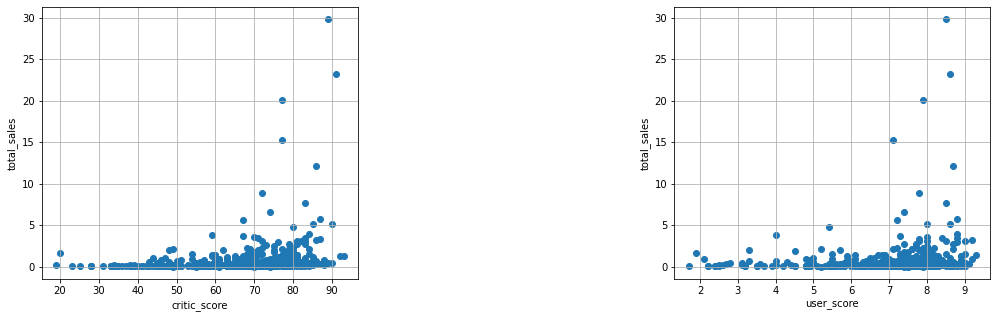

The correlation between total_sales and critic_score = 0.23.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.14.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform XB.




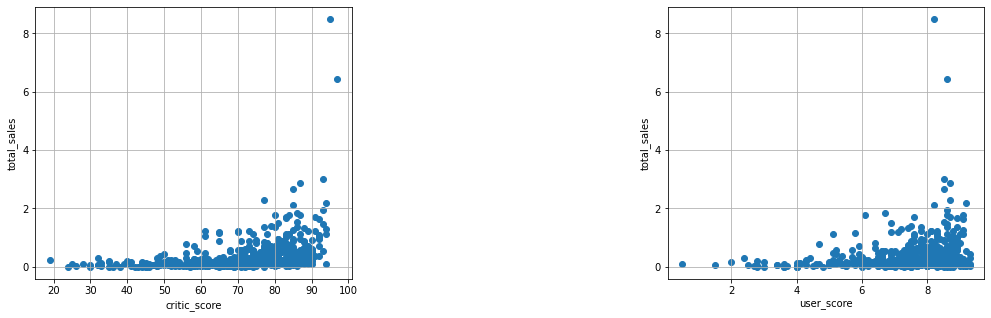

The correlation between total_sales and critic_score = 0.37.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.17.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform PS3.




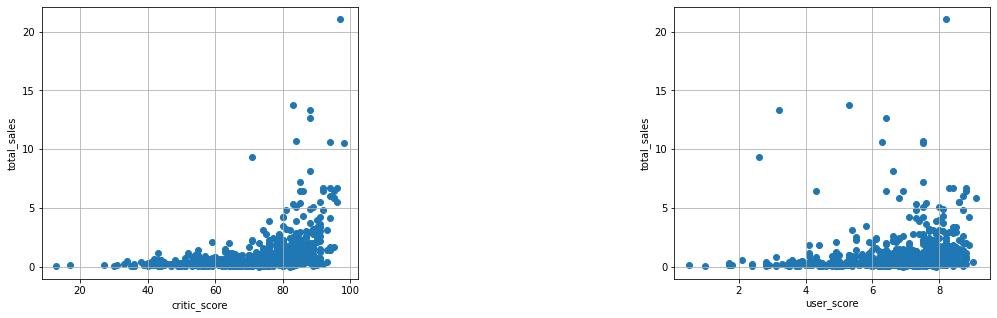

The correlation between total_sales and critic_score = 0.43.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.14.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform GC.




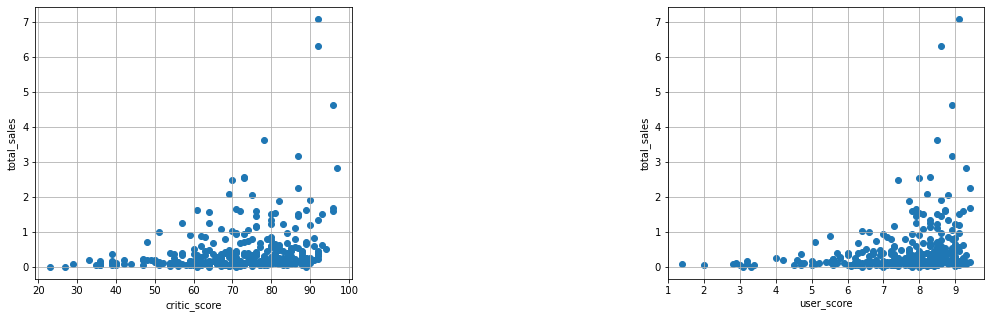

The correlation between total_sales and critic_score = 0.30.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.24.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform PC.




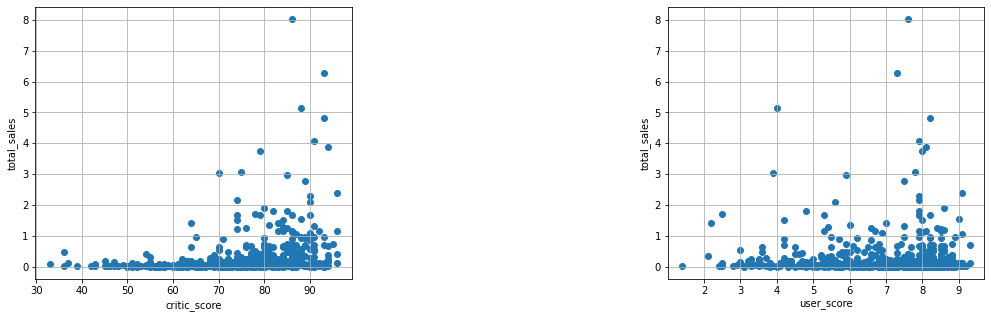

The correlation between total_sales and critic_score = 0.25.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = -0.01.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------

Scatterplots and correlations between critic_score/user_score and total_sales for platform 3DS.




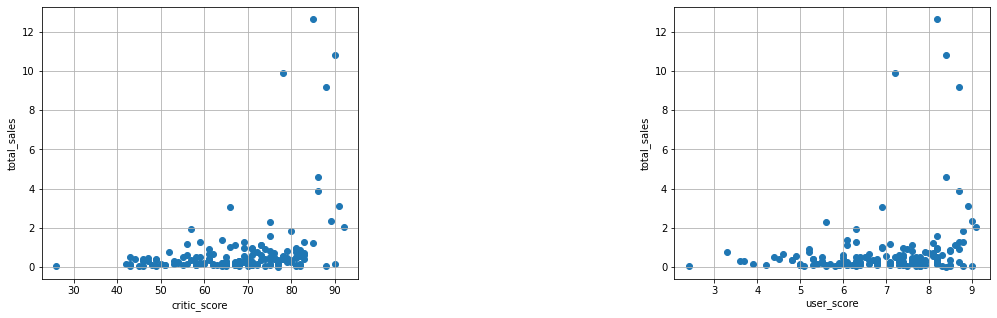

The correlation between total_sales and critic_score = 0.34.
It is weak, thus we can say that critic_score does not influence the total_sales

The correlation between total_sales and user_score = 0.23.
It is weak, thus we can say that user_score does not influence the total_sales

----------------------------------------------------------------------------------------------------



In [53]:
for name in platform_names:
    platform_corr(name)
    print()
    print('-----'*20)
    print()

**Conclusion:** 

Both for PS2 platform and for other platforms with the same games, calculations show that neither **critic_score** nor **user_score** have a strong impact on sales.

[Back to contents](#cont)

**7.** Let's take a look at the general distribution of games by genre.

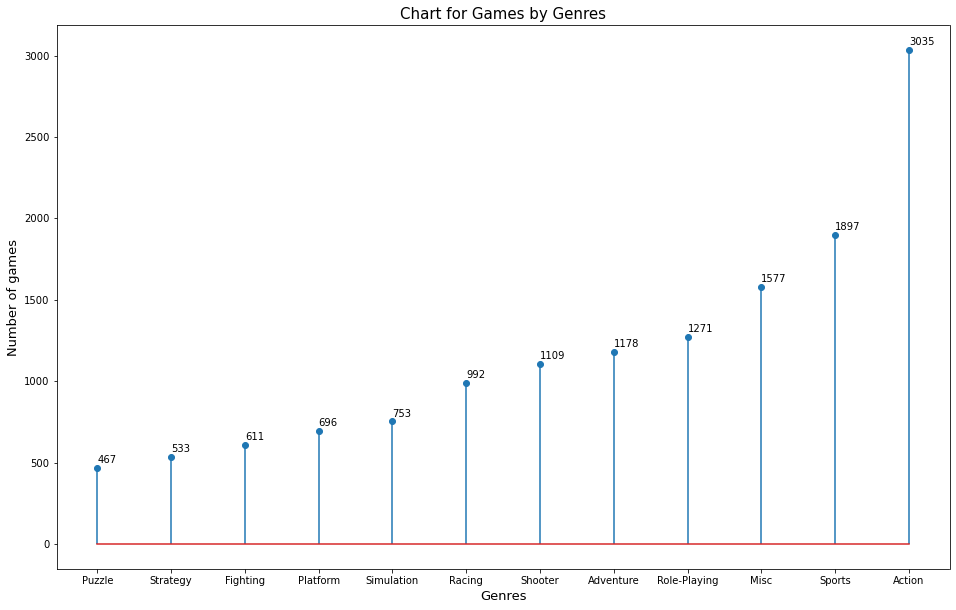

In [54]:
df_genres=df_new[['genre','name']].groupby('genre').count().sort_values(by='name').reset_index()
x=df_genres['genre']
y=df_genres['name']
plt.figure(figsize=(16, 10))

plt.stem(x, y, use_line_collection=True)

plt.title('Chart for Games by Genres', fontdict={'size':15})
plt.ylabel('Number of games', fontdict={'size':13})
plt.xlabel('Genres', fontdict={'size':13})

for row in df_genres.itertuples():
    plt.text(row.genre, row.name+30, s=round(row.name))

plt.show()

**Conclusion:** 

Leader in the number of released games is Action. 

**(!)** Let's check which genre is more profitable. 

[Back to contents](#cont)

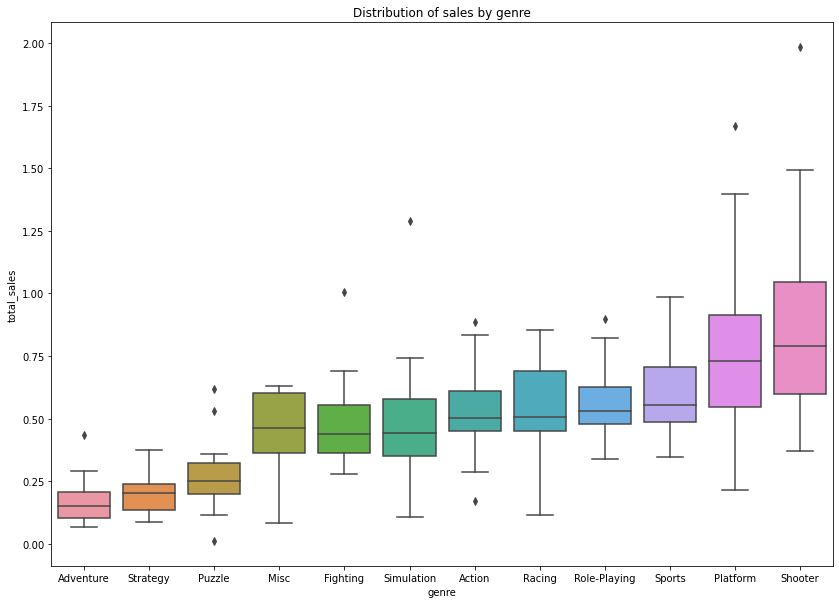

In [55]:
grouped_genres=df_new.groupby(['genre', 'year_of_release'])['total_sales'].mean().reset_index()
ordered=grouped_genres.groupby(['genre'])['total_sales'].mean().sort_values().reset_index()['genre']

plt.figure(figsize=(14,10))
sns.boxplot(x='genre', y='total_sales', data=grouped_genres, order=ordered)
plt.title('Distribution of sales by genre')
plt.show()

**Conclusions:** 

* As we can see from the first graph, the largest number of realesing games is in the genres of Action, Sports, Role-Playing (Misc-all other genres, won't use it). But in the case of sales Shooter is a leader.
* What can I say in common about genres with high and low sales. So, I'm not a gamer and maybe my conclusions are not correct, but in my opinion, due to the fact there are more players among boys/men (than among girls/women), the most profitable genres are "male": Shooter, Platform, Sports. And at the same time Adventure, Strategy, Puzzle - these games are more calm, mostly for individual play than in groups or online; no need to rush with prizes and spend money on internal purchases.

[Back to contents](#cont)

<a id="conc2"></a>
**Conclusions**

1. The number of released games are not significant for every period. Until 1994 less than 100 games were released per year. The peak of production was in 2008-2009. And since 2010, the number of games released has been falling.


2. After calculations I got TOP-9 most profitable platforms (for all years in our dataset): DS, GBA, PS, PS2, PS3, PS4, PSP, Wii, X360.  All of them have periods of growth and decline. Minimum sales in peak years for them - about 50 mln.USD.    


3. Most of these platforms from the list with 0 sales in 2016 have sales of less than 50 mln.USD per year. Five platforms from this list are in the Top-9 (DS, GBA, PS, PS2, PSP). Thus, we can definitely say that these platforms were popular in the past.


4. A new platform appears every 2-3 years, and the old one fades in a period of 2 to 8 years.

5. On the period after 2000 leaders of the sales are PS2, X360 and PS3. Only two platforms (PS4 and XOne) are growing, while the rest are shrinking. The same two platforms we can call potentiotally profitable.


6. The difference in sales between platforms are significant. 


7. Both for PS2 platform and for other platforms with the same games, calculations show that neither critic_score nor user_score have a strong impact on sales.


8. The largest number of realesing games is in the genres of Action, Sports, Role-Playing (Misc-all other genres, won't use it). But in the case of sales Shooter is a leader. The most profitable genres are "male": Shooter, Platform, Sports. 

<a id="id3"></a>
### 3. Creating a user profile for each region

For each region (NA, EU, JP), let's determine:

 - The top five platforms. Describe variations in their market shares from region to region.

 - The top five genres. Explain the difference.

 - Do ESRB ratings affect sales in individual regions?


**1.** Let's find the top five platforms and their market shares for each region:

In [56]:
def top_platf_reg(region):
    top_plat_region=df_new.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=sum).sort_values(by=region,ascending=False).reset_index()
    top_five_region=top_plat_region['platform'].head(5)
    top_plat_region['platform_new']=top_plat_region['platform'].where(top_plat_region['platform'].isin(top_five_region), 'Other')
    top_plat_grouped_region=top_plat_region.pivot_table(index='platform_new', values=['eu_sales','jp_sales','na_sales'],aggfunc=sum).sort_values(by=region).reset_index()
    return top_plat_grouped_region


top_plat_grouped_na_sales=top_platf_reg('na_sales') 
top_plat_grouped_na_sales

platform_new  eu_sales  jp_sales  na_sales
0           DS    188.41    175.00    380.31
1          PS3    327.20     79.41    390.13
2          Wii    258.32     68.28    486.87
3          PS2    321.99    128.67    556.84
4         X360    268.32     12.30    595.74
5        Other    668.59    309.39   1025.22

In [57]:
top_plat_grouped_eu_sales=top_platf_reg('eu_sales') 
top_plat_grouped_eu_sales

platform_new  eu_sales  jp_sales  na_sales
0           DS    188.41    175.00    380.31
1          Wii    258.32     68.28    486.87
2         X360    268.32     12.30    595.74
3          PS2    321.99    128.67    556.84
4          PS3    327.20     79.41    390.13
5        Other    668.59    309.39   1025.22

In [58]:
top_plat_grouped_jp_sales=top_platf_reg('jp_sales') 
top_plat_grouped_jp_sales

platform_new  eu_sales  jp_sales  na_sales
0          PSP     65.62     75.88    107.27
1          PS3    327.20     79.41    390.13
2          3DS     61.27    100.62     82.65
3          PS2    321.99    128.67    556.84
4           DS    188.41    175.00    380.31
5        Other   1068.34    213.47   1917.91

**(!)** Using the tables I have, I want to create different types of graphs to compare market shares by platform and region. The first graph (bar chat) represents a market sales shares according to each platform. The second graph (pie chart) shows platform shares in each region. 

In [59]:
top_plat_grouped_na_sales_copy = copy.deepcopy(top_plat_grouped_na_sales)
top_plat_grouped_na_sales_copy[['eu_sales', 'jp_sales', 'na_sales']] = top_plat_grouped_na_sales_copy[['eu_sales', 'jp_sales', 'na_sales']].apply(lambda x: x/x.sum()*100, axis=1)
top_plat_grouped_na_sales_copy=top_plat_grouped_na_sales_copy.melt(id_vars=['platform_new'], var_name=['type_of_sales'])
top_plat_grouped_na_sales_copy['value']=round(top_plat_grouped_na_sales_copy['value'],2)
fig = px.bar(top_plat_grouped_na_sales_copy, 
             x="platform_new", y='value', color='type_of_sales',
             title="Top 5 Platfroms for NA region",barmode="relative", text='value', labels={'value':'Share,%', 'platform_new': 'Platforms'})
fig.show()

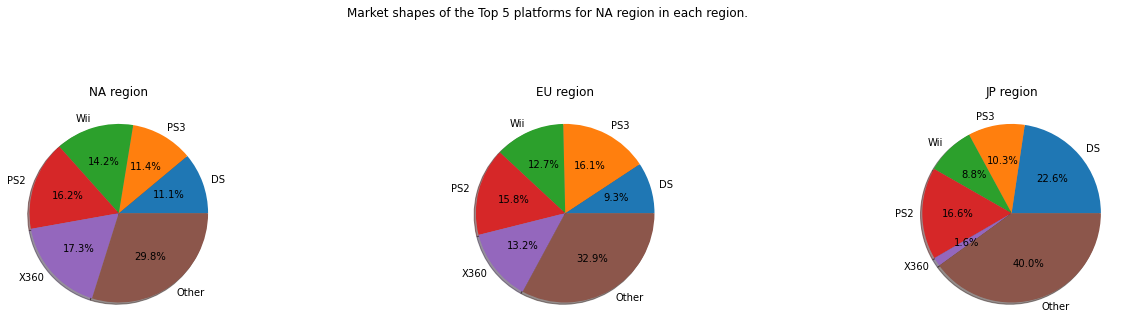

In [60]:
fig, (axs1,axs2,axs3) = plt.subplots(1, 3, figsize=(20,6))
fig.subplots_adjust(hspace=1,wspace=1)
fig.suptitle('Market shapes of the Top 5 platforms for NA region in each region.')

axs1.pie(top_plat_grouped_na_sales['na_sales'], labels=top_plat_grouped_na_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs1.set_title('NA region')

axs2.pie(top_plat_grouped_na_sales['eu_sales'], labels=top_plat_grouped_na_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs2.set_title('EU region')

axs3.pie(top_plat_grouped_na_sales['jp_sales'], labels=top_plat_grouped_na_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs3.set_title('JP region')

plt.show()


**Conclusions:** 

* As the Top-5 platforms for the EU region are the same as for the NA region I won't plot special graphs for the EU region.
* Perhaps the marketing policy of the companies producing platforms and releasing games in different regions, as well as the preferences of the gamers, affect the different level of sales of games in these regions.

In [61]:
top_plat_grouped_eu_sales_copy = copy.deepcopy(top_plat_grouped_eu_sales)
top_plat_grouped_eu_sales_copy[['eu_sales', 'jp_sales', 'na_sales']] = top_plat_grouped_eu_sales_copy[['eu_sales', 'jp_sales', 'na_sales']].apply(lambda x: x/x.sum()*100, axis=1)
top_plat_grouped_eu_sales_copy=top_plat_grouped_eu_sales_copy.melt(id_vars=['platform_new'], var_name=['type_of_sales'])
top_plat_grouped_eu_sales_copy['value']=round(top_plat_grouped_eu_sales_copy['value'],2)
fig = px.bar(top_plat_grouped_eu_sales_copy, 
             x="platform_new", y='value', color='type_of_sales',
             title="Top 5 Platfroms for EU region",barmode="relative", text='value', labels={'value':'Share,%', 'platform_new': 'Platforms'})
fig.show()

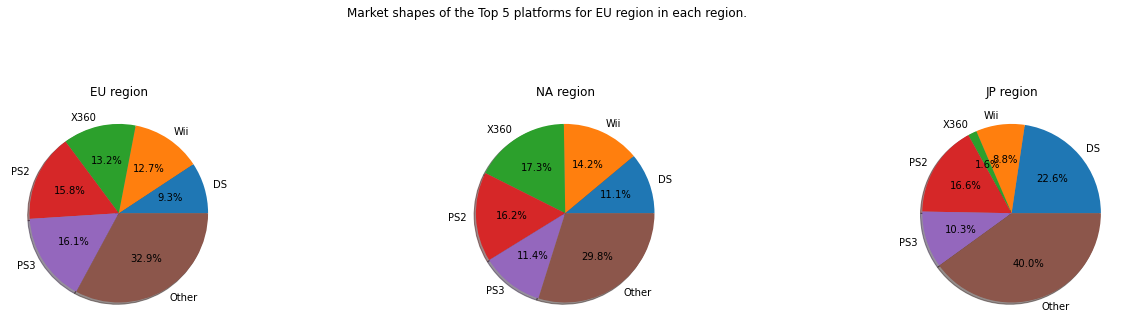

In [62]:
fig, (axs1,axs2,axs3) = plt.subplots(1, 3, figsize=(20,6))
fig.subplots_adjust(hspace=1,wspace=1)
fig.suptitle('Market shapes of the Top 5 platforms for EU region in each region.')

axs1.pie(top_plat_grouped_eu_sales['eu_sales'], labels=top_plat_grouped_eu_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs1.set_title('EU region')

axs2.pie(top_plat_grouped_eu_sales['na_sales'], labels=top_plat_grouped_eu_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs2.set_title('NA region')

axs3.pie(top_plat_grouped_eu_sales['jp_sales'], labels=top_plat_grouped_eu_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs3.set_title('JP region')

plt.show()

In [63]:
top_plat_grouped_jp_sales_copy = copy.deepcopy(top_plat_grouped_jp_sales)
top_plat_grouped_jp_sales_copy[['eu_sales', 'jp_sales', 'na_sales']] = top_plat_grouped_jp_sales_copy[['eu_sales', 'jp_sales', 'na_sales']].apply(lambda x: x/x.sum()*100, axis=1)
top_plat_grouped_jp_sales_copy=top_plat_grouped_jp_sales_copy.melt(id_vars=['platform_new'], var_name=['type_of_sales'])
top_plat_grouped_jp_sales_copy['value']=round(top_plat_grouped_jp_sales_copy['value'],2)
fig = px.bar(top_plat_grouped_jp_sales_copy, 
             x="platform_new", y='value', color='type_of_sales',
             title="Top 5 Platfroms for JP",barmode="relative", text='value', labels={'value':'Market share,%', 'platform_new': 'Platforms'})
fig.show()

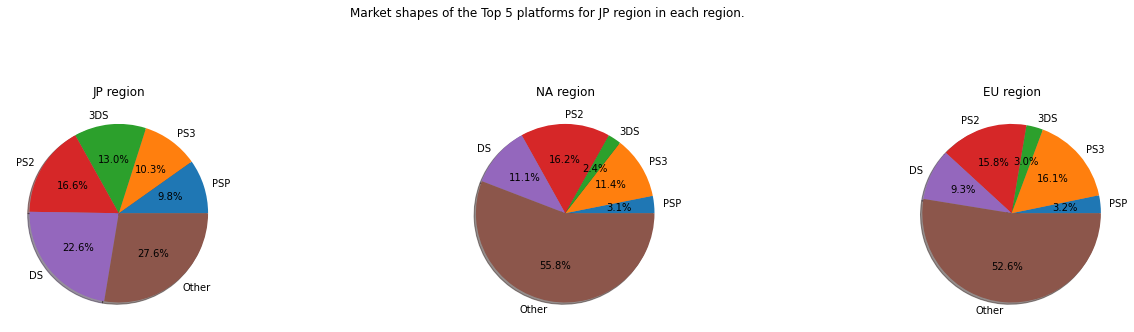

In [64]:
fig, (axs1,axs2,axs3) = plt.subplots(1, 3, figsize=(20,6))
fig.subplots_adjust(hspace=1,wspace=1)
fig.suptitle('Market shapes of the Top 5 platforms for JP region in each region.')

axs1.pie(top_plat_grouped_jp_sales['jp_sales'], labels=top_plat_grouped_jp_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs1.set_title('JP region')

axs2.pie(top_plat_grouped_jp_sales['na_sales'], labels=top_plat_grouped_jp_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs2.set_title('NA region')

axs3.pie(top_plat_grouped_jp_sales['eu_sales'], labels=top_plat_grouped_jp_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs3.set_title('EU region')

plt.show()

**(!)** And one more graph: pie charts with Top-5 platforms for each region.

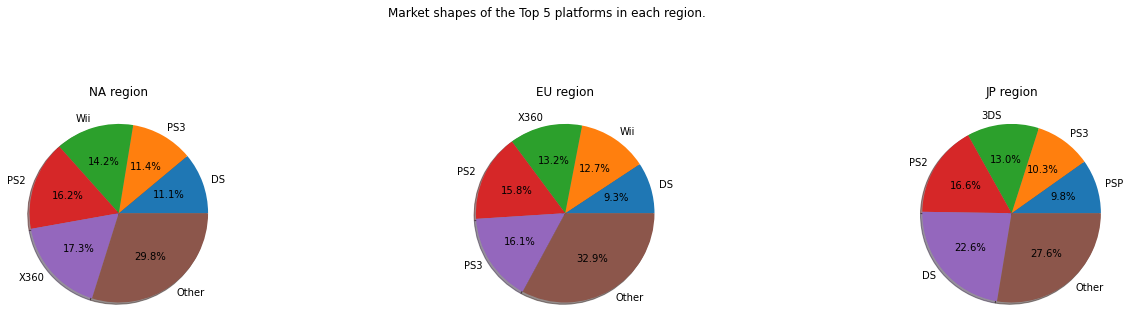

In [65]:
fig, (axs1,axs2,axs3) = plt.subplots(1, 3, figsize=(20,6))
fig.subplots_adjust(hspace=1,wspace=1)
fig.suptitle('Market shapes of the Top 5 platforms in each region.')

axs1.pie(top_plat_grouped_na_sales['na_sales'], labels=top_plat_grouped_na_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs1.set_title('NA region')

axs2.pie(top_plat_grouped_eu_sales['eu_sales'], labels=top_plat_grouped_eu_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs2.set_title('EU region')

axs3.pie(top_plat_grouped_jp_sales['jp_sales'], labels=top_plat_grouped_jp_sales['platform_new'], autopct='%1.1f%%', shadow=True)
axs3.set_title('JP region')

plt.show()

**Conclusion:**

1. The Top-5 platforms for the EU region are the same as for the NA region: DS, PS3, Wii, PS2, X360. But they have different leaders: X360 for the NA region with 17.3% of its market and PS3 for the EU region with 16.1% of its market.

2. Each of the top platforms in the NA region (except PS3) accounts for over 50% of total sales.

3. For local markets in the NA and EU regions sales of the top platforms exceed 65%. 

4. The JP region market is differ than in the NA and EU: top-5 platforms are PSP(instead of Wii), PS3, 3DS (instead of X360), PS2, DS. The leader is DS with 22.6% of its market sales.

5. Sales of the top platforms in the JP region exceed 70% of its market.

[Back to contents](#cont)

**2.** Let's find the top five genres for each region:

In [66]:
def top_genres_reg(region):
    top_genres_region=df_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=sum).sort_values(by=region,ascending=False).reset_index()
    top_five_region=top_genres_region['genre'].head(5)
    top_genres_region['genre_new']=top_genres_region['genre'].where(top_genres_region['genre'].isin(top_five_region), 'Other')
    top_genres_grouped_region=top_genres_region.pivot_table(index='genre_new', values=['eu_sales','jp_sales','na_sales'], aggfunc=sum).sort_values(by=region).reset_index()
    return top_genres_grouped_region


top_genres_grouped_na_sales=top_genres_reg('na_sales') 
top_genres_grouped_na_sales

genre_new  eu_sales  jp_sales  na_sales
0  Role-Playing    151.48    225.91    275.10
1          Misc    191.80     82.66    358.13
2       Shooter    291.85     23.08    491.23
3        Sports    329.80     69.52    566.64
4        Action    455.74    128.49    734.48
5         Other    612.16    243.39   1009.53

In [67]:
top_genres_grouped_eu_sales=top_genres_reg('eu_sales') 
top_genres_grouped_eu_sales

genre_new  eu_sales  jp_sales  na_sales
0    Racing    185.52     26.59    261.31
1      Misc    191.80     82.66    358.13
2   Shooter    291.85     23.08    491.23
3    Sports    329.80     69.52    566.64
4    Action    455.74    128.49    734.48
5     Other    578.12    442.71   1023.32

In [68]:
top_genres_grouped_jp_sales=top_genres_reg('jp_sales') 
top_genres_grouped_jp_sales

genre_new  eu_sales  jp_sales  na_sales
0      Platform    135.36     52.71    249.68
1        Sports    329.80     69.52    566.64
2          Misc    191.80     82.66    358.13
3        Action    455.74    128.49    734.48
4         Other    768.65    213.76   1251.08
5  Role-Playing    151.48    225.91    275.10

**(!)** To compare genres in different regions, I will only plot 3 pie charts with the sales shares of the top 5 genres for each region.

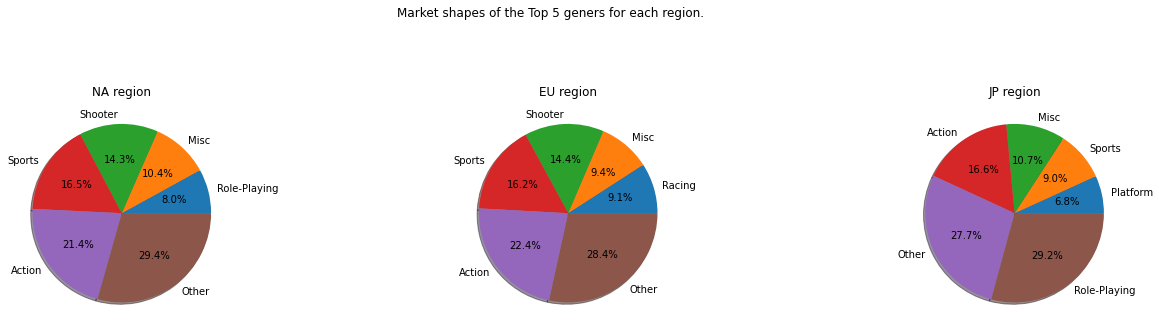

In [69]:
fig, (axs1,axs2,axs3) = plt.subplots(1, 3, figsize=(20,6))
fig.subplots_adjust(hspace=1,wspace=1)
fig.suptitle('Market shapes of the Top 5 geners for each region.')

axs1.pie(top_genres_grouped_na_sales['na_sales'], labels=top_genres_grouped_na_sales['genre_new'], autopct='%1.1f%%', shadow=True)
axs1.set_title('NA region')

axs2.pie(top_genres_grouped_eu_sales['eu_sales'], labels=top_genres_grouped_eu_sales['genre_new'], autopct='%1.1f%%', shadow=True)
axs2.set_title('EU region')

axs3.pie(top_genres_grouped_jp_sales['jp_sales'], labels=top_genres_grouped_jp_sales['genre_new'], autopct='%1.1f%%', shadow=True)
axs3.set_title('JP region')

plt.show()


**Conclusion:**

1. There are three genres that are in the Top-5 for all regions: Action, Sport, Misc. Shooter is in the Top-5 for the NA and EU regions. Role-Playing is in the Top-5 for the NA and JP regions. Racing is in the EU region. Platform is in the JP region.

2. The leaders for each regions: Action with 21.4% and 22.4% in the NA and EU regions; and Role-Playing with 29.2% in the JP region.

[Back to contents](#cont)

**(!)** Let's find out if ESRB ratings affect sales in individual regions.

In [70]:
grouped_rating_na=df_new.groupby(['rating', 'year_of_release'])['na_sales'].mean().reset_index()
grouped_rating_eu=df_new.groupby(['rating', 'year_of_release'])['eu_sales'].mean().reset_index()
grouped_rating_jp=df_new.groupby(['rating', 'year_of_release'])['jp_sales'].mean().reset_index()

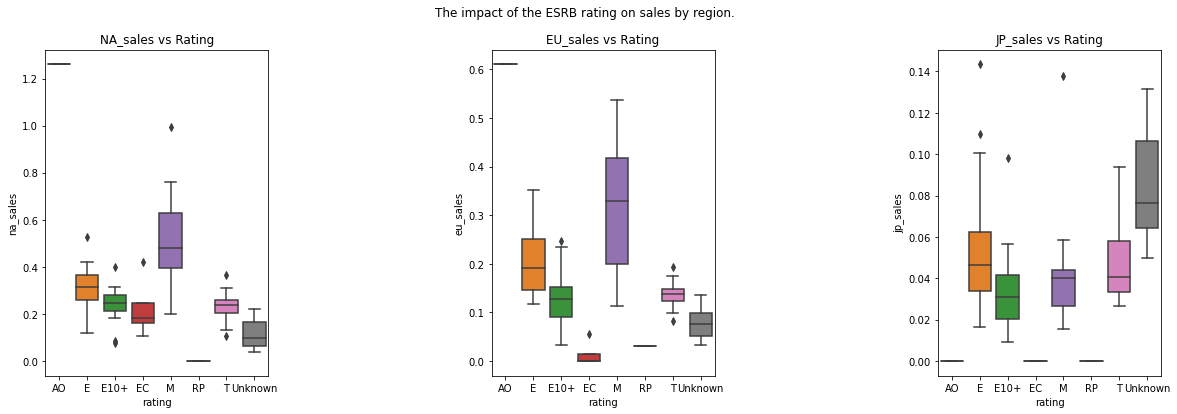

In [71]:
fig, (axs1,axs2,axs3) = plt.subplots(1, 3, figsize=(20,6))
fig.subplots_adjust(hspace=1,wspace=1)
fig.suptitle('The impact of the ESRB rating on sales by region.')

sns.boxplot(ax=axs1, x='rating', y='na_sales', data=grouped_rating_na)
axs1.set_title('NA_sales vs Rating')

sns.boxplot(ax=axs2, x='rating', y='eu_sales', data=grouped_rating_eu)
axs2.set_title('EU_sales vs Rating')

sns.boxplot(ax=axs3, x='rating', y='jp_sales', data=grouped_rating_jp)
axs3.set_title('JP_sales vs Rating')

plt.show()

**Conslusion:** 

Yes, we can say that ESRB reting affect sales in individual regions.

[Back to contents](#cont)

<a id="conc3"></a>
**Conclusions**

1. The Top-5 platforms for the EU region are the same as for the NA region: DS, PS3, Wii, PS2, X360. But they have different leaders: X360 for the NA region with 17.3% of its market and PS3 for the EU region with 16.1% of its market.


2. Each of the top platforms in the NA region (except PS3) accounts for over 50% of total sales.


3. For local markets in the NA and EU regions sales of the top platforms exceed 65%. 


4. The JP region market is differ than in the NA and EU: top-5 platforms are PSP(instead of Wii), PS3, 3DS (instead of X360), PS2, DS. The leader is DS with 22.6% of its market sales.


5. Sales of the top platforms in the JP region exceed 70% of its market.


6. There are three genres that are in the Top-5 for all regions: Action, Sport, Misc. Shooter is in the Top-5 for the NA and EU regions. Role-Playing is in the Top-5 for the NA and JP regions. Racing is in the EU region. Platform is in the JP region.


7. The leaders for each regions: Action with 21.4% and 22.4% in the NA and EU regions; and Role-Playing with 29.2% in the JP region.


8. ESRB reting affect sales in individual regions

[Back to contents](#cont)

<a id="id4"></a>
### 4. Hypothesis testing:

<a id="task5_1"></a>
**1.** Let's check if the average user ratings of the Xbox One and PC platforms are the same.

**(!)** Since XOne platform appeared only in 2013, I'll take the data after 2012y. for that task.

In [72]:
df_filtered_new=df_filtered[df_filtered['year_of_release']>2012]
df_filtered_new.sample(5)

name platform  year_of_release    genre  \
357                      Battlefield 4      PS4             2013  Shooter   
7574                           FIFA 16       PC             2015   Sports   
13986   Castlevania: Lords of Shadow 2       PC             2014   Action   
15485  Darksiders: Warmastered Edition      PS4             2016   Action   
3369                            NHL 15      PS4             2014   Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
357        1.35      1.55      0.17         0.51            85         6.9   
7574       0.06      0.13      0.00         0.01            81         4.4   
13986      0.01      0.03      0.00         0.00            58         7.7   
15485      0.02      0.00      0.00         0.00            79         8.5   
3369       0.31      0.19      0.00         0.10            60         3.6   

      rating  total_sales  
357        M         3.58  
7574       E         0.20  
13986      M         0.04  
15485      M         0.02  
3369    E10+         0.60

**(!)** Our hypothesis:
* **H-0** is "Average user ratings of the Xbox One and PC platforms are the same". 
* **H-1** is "Average user rating of the Xbox and PC platforms are different".

So, let's check it. But first I want to check vars of two sets to decide what the value of the parameter "equal_var" would be.

In [73]:
alpha=0.05
results_levene = st.levene(df_filtered_new.query('platform == "XOne"')['user_score'], df_filtered_new.query('platform == "PC"')['user_score'], center='median')
print('p-value:', results_levene.pvalue)
if (results_levene.pvalue < alpha):   
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.004442299673698059
We reject the null hypothesis


**(!)** The "vars" are different, so I'll use it in the formula of testing hypothesis

In [74]:
alpha = 0.05
results = st.ttest_ind(df_filtered_new.query('platform == "XOne"')['user_score'], df_filtered_new.query('platform == "PC"')['user_score'], equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):   
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.17882648263401307
We can't reject the null hypothesis


<a id="conc5_1"></a>
**Conclusions** 

Since the *p-value* is more than *alpha* it means that we can't reject our **H-0** ("*Average user ratings of the Xbox One and PC platforms are the same*"). 

Thus, ___"Average user ratings of the Xbox One and PC platforms are the same."___

[Back to contents](#cont)

<a id="task5_2"></a>
**2.** Let's check if the average user ratings for the Action and Sports genres are different.

**(!)** Our hypothesis
 * **H-0** is "Average user ratings for the Action and Sports genres are the same". 
 * **H-1** is "Average user ratings for the Action and Sports genres are different." 
 
 So, let's check it. But once more I want to check vars of two sets to decide what the value of the parameter "equal_var" would be.*

In [75]:
alpha=0.05
results_levene = st.levene(df_filtered.query('genre == "Action"')['user_score'], df_filtered.query('genre == "Sports"')['user_score'], center='median')
print('p-value:', results_levene.pvalue)
if (results_levene.pvalue < alpha):   
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.04269872268870945
We reject the null hypothesis


**(!)** The "vars" are different, so I'll use it in the formula of testing hypothesis.

In [76]:
alpha = 0.05
results = st.ttest_ind(df_filtered.query('genre == "Action"')['user_score'], df_filtered.query('genre == "Sports"')['user_score'], equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):   
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.999217924124385
We can't reject the null hypothesis


[Back to contents](#cont)

<a id="conc5_2"></a>
**Conclusions**

Since the *p-value* is more than *alpha* it means that we can't reject our **H-0** ("*Average user ratings for the Action and Sports genres are the same*"). 

Thus, ___"Average user ratings for the Action and Sports genres are the same."___

<a id="id6"></a>
### 6. General conclusion

Our project has a dataset with titles, genres of released games by platform with sales in the NA, EU, JP regions from 1980 to 2016 with reviews from critics and users, as well as an ESRB rating.

**After preprocessing and exploratory data analysis, I got the following results:**

1. The number of released games are not significant for every period. Until **1994** less than **100 games** were released per year. The peak of production was in **2008-2009**. And since **2010**, the number of games released has been falling.

2. After calculations I got **TOP-9** most profitable platforms (for all years in our dataset): **DS, GBA, PS, PS2, PS3, PS4, PSP, Wii, X360**. All of them have periods of growth and decline. Minimum sales in peak years for them - about **50 mln.USD***.

3. Most of these platforms from the list with **0** sales in **2016** have sales of less than **50 mln.USD** per year. Five platforms from this list are in the **Top-9** (**DS, GBA, PS, PS2, PSP**). Thus, we can definitely say that these platforms were popular in the past.

4. A *new* platform appears every **2-3 years**, and the *old* one fades in a period of **2 to 8 years**.

5. On the period after **2000** leaders of the sales are **PS2, X360** and **PS3**. Only two platforms (**PS4** and **XOne**) are growing, while the rest are shrinking. The same two platforms we can call potentiotally profitable.

6. The difference in sales between platforms are significant.

7. Both for PS2 platform and for other platforms with the same games, calculations show that neither critic_score nor user_score have a strong impact on sales.

8. The largest number of realesing games is in the genres of **Action, Sports, Role-Playing** (Misc-all other genres, won't use it). But in the case of sales **Shooter** is a leader. The most profitable genres are "male": **Shooter, Platform, Sports**.


**A user profile for each region shows:**

1. The **Top-5** platforms for the *EU* region are the same as for the *NA* region: **DS, PS3, Wii, PS2, X360**. But they have different leaders: **X360** for the *NA* region with **17.3%** of its market and **PS3** for the *EU* region with **16.1%** of its market.

2. Each of the top platforms in the *NA* region (except **PS3**) accounts for over **50%** of total sales.

3. For local markets in the *NA* and *EU* regions sales of the top platforms exceed **65%**.

4. The *JP* region market is differ than in the *NA* and *EU*: **Top-5** platforms are **PSP**(instead of **Wii**), **PS3, 3DS** (instead of **X360**), **PS2, DS**. The leader is **DS** with **22.6%** of its market sales.

5. Sales of the top platforms in the *JP* region exceed **70%** of its market.

6. There are three genres that are in the **Top-5** for all regions: **Action, Sport, Misc. Shooter** is in the **Top-5** for the *NA* and *EU* regions. **Role-Playing** is in the **Top-5** for the *NA* and *JP* regions. **Racing** is in the *EU* region. **Platform** is in the *JP* region.

7. The leaders for each regions: **Action** with **21.4%** and **22.4%** in the *NA* and *EU* regions; and **Role-Playing** with **29.2%** in the *JP* region.

8. **ESRB** reting affect sales in individual regions


**Testing the hypothesis gives the following results:**

1. Average user ratings of the Xbox One and PC platforms are the same - **TRUE**

2. Average user ratings for the Action and Sports genres are different - **FALSE**


[Back to contents](#cont)